In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
train = pd.read_csv("./data.csv")

In [3]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,509,147,621,254
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,444,146,514,258
2,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,345,219,457,328
3,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,287,340,407,445
4,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,1,154,86,245


In [4]:
train['xmin'],train['xmax'] = train['xmin'] / 640,train['xmax'] / 640
train['ymin'],train['ymax'] = train['ymin'] / 480,train['ymax'] / 480

In [5]:
train.head(2)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.795312,0.306250,0.970313,0.529167
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.693750,0.304167,0.803125,0.537500


In [8]:
data = []
grouped = train.groupby(by='filename')

for i in train.filename.unique():
    boxes = list(grouped.get_group(i)[['class','xmin','ymin','xmax','ymax']].T.to_dict().values())
    data.append({
        'filename':i,
        'boxes':boxes
    })

In [9]:
data[0]

{'filename': './JPEGImages/BloodImage_00266.jpg',
 'boxes': [{'class': 'RBC',
   'xmin': 0.7953125,
   'ymin': 0.30625,
   'xmax': 0.9703125,
   'ymax': 0.5291666666666667},
  {'class': 'RBC',
   'xmin': 0.69375,
   'ymin': 0.30416666666666664,
   'xmax': 0.803125,
   'ymax': 0.5375},
  {'class': 'RBC',
   'xmin': 0.5390625,
   'ymin': 0.45625,
   'xmax': 0.7140625,
   'ymax': 0.6833333333333333},
  {'class': 'RBC',
   'xmin': 0.4484375,
   'ymin': 0.7083333333333334,
   'xmax': 0.6359375,
   'ymax': 0.9270833333333334},
  {'class': 'RBC',
   'xmin': 0.0015625,
   'ymin': 0.32083333333333336,
   'xmax': 0.134375,
   'ymax': 0.5104166666666666},
  {'class': 'RBC',
   'xmin': 0.4734375,
   'ymin': 0.18125,
   'xmax': 0.6078125,
   'ymax': 0.37083333333333335},
  {'class': 'RBC',
   'xmin': 0.59375,
   'ymin': 0.025,
   'xmax': 0.728125,
   'ymax': 0.21458333333333332},
  {'class': 'RBC',
   'xmin': 0.8796875,
   'ymin': 0.5229166666666667,
   'xmax': 0.9984375,
   'ymax': 0.7291666666666

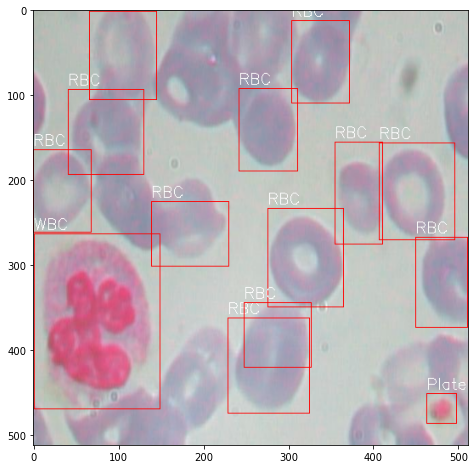

In [10]:
image = data[0]

img = cv2.imread(image['filename'])
img = cv2.resize(img,(512,512))

for box in image['boxes']:
    img = cv2.putText(img,box['class'],(int(box['xmin']*512),int(box['ymin']*512)-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255))
    img = cv2.rectangle(
            img,
            (int(box['xmin']*512),int(box['ymin']*512)),
            (int(box['xmax']*512),int(box['ymax']*512)),
            (255,0,0),
            1
        )

plt.figure(figsize=(12,8))
plt.imshow(img)

In [201]:
images = np.array([cv2.resize(cv2.imread(i['filename']),(448,448)) for i in data])

In [202]:
images = images.astype(np.float32) / 255

In [203]:
# ratios = np.array([
#         [12,12],
#         [16,8],
#         [8,16],
#         [24,24],
#         [32,16],
#         [16,32],
#         [48,48],
#         [64,32],
#         [32,64]
#     ])

# sizes = ratios * 2

# def get_anchors(input_shape = (512,512),grid_size= 16,n_classes=3):
#     """
#     generates anchor boxes, dummy scores and grid
#     returns boxes,scores,grid
    
#     input_shape : tuple, input image shape (height,width)
#     grid_size   : int, size of grid
#     """
#     x = np.arange(0,input_shape[0],input_shape[0]//grid_size)
#     y = np.arange(0,input_shape[1],input_shape[1]//grid_size)
#     xx,yy =np.meshgrid(x,y)
#     xx = xx.reshape(-1,grid_size,1)
#     yy = yy.reshape(-1,grid_size,1)
#     grid = np.concatenate((xx,yy),axis=2)
#     boxes = []
#     for r in ratios:
#         mn = grid - r
#         mx = grid + r
#         box = np.concatenate((mn,mx),axis=2)
#         box[box > 512] = 512
#         box[box < 0] = 0
#         boxes.append(box)
        
#     scores = np.zeros((9,grid_size,grid_size,n_classes+1),dtype=np.float32)
#     scores[:,:,:,0] = 1.0
#     return np.array(boxes),scores,grid

In [204]:
# boxes,scores_,grid = get_anchors()

In [205]:
# image = data[0]
# img = cv2.imread(image['filename'])

# img = cv2.resize(img,(512,512))

# grid_img = img.copy()
# box_img = img.copy()

# box_colors = [
#     (180,0,0),
#     (220,0,0),
#     (255,0,0),
#     (0,180,0),
#     (0,220,0),
#     (0,255,0),
#     (0,0,180),
#     (0,0,220),
#     (0,0,255),
# ]

# boxes,scores,grid = get_anchors()

# for box in image['boxes']:
#     grid_img = cv2.putText(grid_img,box['class'],(int(512*box['xmin']),int(512*box['ymin'])-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255))
#     grid_img = cv2.rectangle(
#                     grid_img,
#                     (int(512*box['xmin']),int(512*box['ymin'])),
#                     (int(512*box['xmax']),int(512*box['ymax'])),
#                     (255,0,0),
#                     1
#             )

# for x,y in grid.reshape(-1,2):
#     grid_img = cv2.rectangle(grid_img,(x-1,y-1),(x+2,y+2),(0,0,0),-1)
    

# for i,b in enumerate(boxes):
#     for xmin,ymin,xmax,ymax in b.reshape(-1,4).astype(np.uint64):#[136:137]:
#         box_img = cv2.rectangle(box_img,(xmin,ymin),(xmax,ymax),box_colors[i],1)

# for x,y in grid.reshape(-1,2):#[136:137]:
#     box_img = cv2.rectangle(box_img,(x-2,y-2),(x+2,y+2),(200,200,0),-1)
        

# fig,axes = plt.subplots(2,1,figsize=(13,26))
# axes[0].axis("off"),axes[1].axis("off")

# axes[0].imshow(grid_img)
# axes[1].imshow(box_img)

In [206]:

# def get_closest(x,y,w,h,grid_size=32):
#     """
#     finds closest grid points for the given point on image
#     returns : grid
    
#     x : int, x 
#     y : int, y
#     w : int, height of the box
#     h : int, width of the box
#     grid_size : strides 
#     """
#     dx,dy = x//grid_size,y//grid_size
#     xx = []
#     yy = []
#     distX = np.square((dx*grid_size)-x)
#     distY = np.square((dy*grid_size)-y)
    
#     if distX > 256:
#         dx += 1
#     if distY > 256:
#         dy += 1
    
#     if w > 144:
#         xx = [(dx)*grid_size,(dx+1)*grid_size,(dx-1)*grid_size]
#     elif w > 96:
#         xx = [(dx)*grid_size,(dx+1)*grid_size if ((dx*grid_size)-x) <=0 else (dx-1)*grid_size]
#     else:
#         xx = [(dx)*grid_size]
    
#     if h > 144:
#         yy = [(dy)*grid_size,(dy+1)*grid_size,(dy-1)*grid_size]
#     elif h > 96:
#         yy = [(dy)*grid_size,(dy+1)*grid_size if ((dy*grid_size)-y) <=0 else (dy-1)*grid_size]
#     else:
#         yy = [(dy)*grid_size]
    
#     xx,yy =np.meshgrid(xx,yy)
#     xx = xx.reshape(-1,len(xx),1)
#     yy = yy.reshape(-1,len(yy),1)
#     grid = np.concatenate((xx,yy),axis=2).reshape(-1,2)    
#     grid[grid > 480] = 480
#     return grid


In [207]:
# def label_image(image,n_classes=3):
#     """
#     generates anchors and scores for the image provided
#     returns : image,boxes,scores,grid,labeled_boxes
    
#     image : dict 
#     """
#     boxes_ = np.array([[int(i['xmin']*512),int(i['ymin']*512),int(i['xmax']*512),int(i['ymax']*512)] for i in image['boxes']])
#     classes_ = [i['class'] for i in image['boxes']]
    
#     boxes,scores,grid = get_anchors()
#     labeled_boxes = get_labeled_boxes(classes_,boxes_)

#     for label in labeled_boxes:
#         for c in label['c_index']:
#             for x,y in label['true_boxes']:
#                 score = np.zeros(n_classes+1,dtype=np.float32)
#                 score[label['class']] = 1.0
#                 scores[c][[y],[x]] = score
    
#     return cv2.imread(image['filename']),boxes,scores,grid,labeled_boxes
    

In [208]:
# img = data[6].copy()

# img,boxes,scores,grid,labeled_boxes = label_image(img)

# img = cv2.resize(img,(512,512))

# for x,y in grid.reshape(-1,2):
#     img = cv2.rectangle(img,(x-1,y-1),(x+2,y+2),(0,0,0),-1)

# for l in labeled_boxes:
#     x,y = l['closest'][0]
#     img = cv2.rectangle(img,(x-1,y-1),(x+2,y+2),(255,255,0),-1)

# c = [
#     (255,255,255),
#     (255,0,0),
#     (0,0,255),
#     (0,255,0)
# ]

# for score,(xmin,ymin,xmax,ymax) in zip(scores.reshape(-1,4),boxes.reshape(-1,4)):
#     score = score.argmax()
#     if score:
#         img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),c[int(score)],1)
    
# plt.figure(figsize=(13,13))
# plt.imshow(img)

In [209]:
# i = 0

# img = data[i].copy()
# img,boxes,scores,grid,labeled_boxes = label_image(img)
# img = cv2.resize(img,(512,512))
# for x,y in grid.reshape(-1,2):
#     img = cv2.rectangle(img,(x-1,y-1),(x+2,y+2),(0,0,0),-1)

# for l in labeled_boxes:
#     x,y = l['closest'][0]
#     img = cv2.rectangle(img,(x-1,y-1),(x+2,y+2),(255,255,0),-1)

# c = [
#     (255,255,255),
#     (255,0,0),
#     (0,0,255),
#     (0,255,0)
# ]

# b_ = []

# for score,(xmin,ymin,xmax,ymax) in zip(scores.reshape(-1,4),boxes.reshape(-1,4)):
#     score = score.argmax()
#     if score == 2:
#         b_.append([xmin,ymin,xmax,ymax])
#         img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),c[int(score)],1)
    
# plt.figure(figsize=(13,13))
# plt.imshow(img)

In [210]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.layers import *
from tensorflow.keras import backend as K

In [349]:
_input = Input(shape=(448,448,3))


def block(name:str,filters:int,ksize:int,_input:Layer,pool=False):
    block_0 = Conv2D(filters,ksize,activation="relu",padding="same",name=f"block_{name}_conv0")(_input)
    block_1 = Conv2D(filters,ksize,activation="relu",padding="same",name=f"block_{name}_conv1")(block_0)
    block_2 = BatchNormalization(name=f"block_{name}_norm_0")(block_1)
    block_3 = Conv2D(filters,ksize,activation="relu",padding="same",name=f"block_{name}_conv2")(block_2)
    block_4 = Conv2D(filters,ksize,activation="relu",padding="same",name=f"block_{name}_conv3")(block_3)
    block_5 = BatchNormalization(name=f"block_{name}_norm_1")(block_4)
    
    block_out = concatenate([_input,block_5],name=f"block_{name}_conc")
    if pool:
        block_out = MaxPool2D(name=f"block_{name}_pool")(block_out)
    return block_out


_in = Conv2D(128,7,activation="relu",strides=2,padding="same",)(_input)
a  = block(name="a",filters=32,ksize=3,_input=_in,pool=True)
b  = block(name="b",filters=64,ksize=3,_input=a,pool=True)
c  = block(name="c",filters=128,ksize=3,_input=b,pool=True)
d  = block(name="d",filters=256,ksize=3,_input=c)
e = Conv2D(1024,3,activation="relu",strides=2,padding="same")(d)

prob = Conv2D(5,1,padding="same")(e)
prob = BatchNormalization()(prob)
prob = Activation("sigmoid",name="prob")(prob)

box = Conv2D(10,1,padding="same")(e)
box = BatchNormalization()(box)
box = Activation("sigmoid",name="box")(box)

net = keras.Model(_input,[prob,box])

In [350]:
net.summary()

Model: "model_50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_73 (InputLayer)           [(None, 448, 448, 3) 0                                            
__________________________________________________________________________________________________
conv2d_296 (Conv2D)             (None, 224, 224, 128 18944       input_73[0][0]                   
__________________________________________________________________________________________________
block_a_conv0 (Conv2D)          (None, 224, 224, 32) 36896       conv2d_296[0][0]                 
__________________________________________________________________________________________________
block_a_conv1 (Conv2D)          (None, 224, 224, 32) 9248        block_a_conv0[0][0]              
___________________________________________________________________________________________

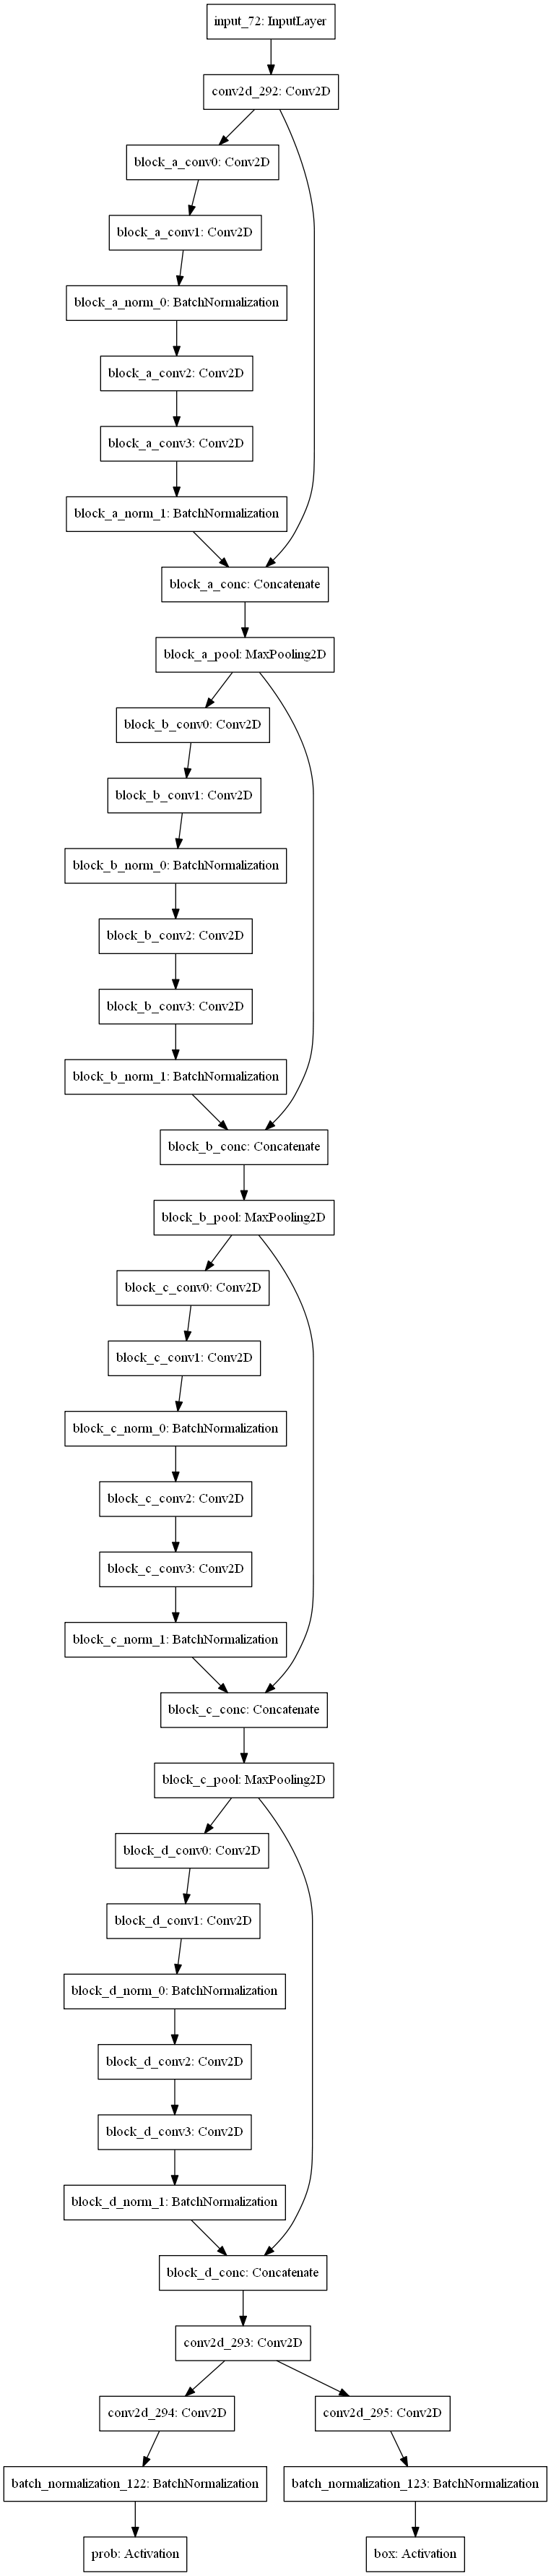

In [343]:
keras.utils.plot_model(net)

In [348]:
%%time
a = net(images[0:1])

Wall time: 91.2 ms
